<a href="https://colab.research.google.com/github/AlexeyBudarov/Testing-statistical-hypotheses.-Course-paper/blob/main/Statistical_hypotheses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# from scipy import standard_error, stats, confidence_interval
from scipy import stats
# plt.style.use('_mpl-gallery')
matplotlib.style.use('ggplot')
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 5)

In [ ]:
def load_data_2():
    df = pd.read_excel('Время_работы.xls')

    df = df.dropna()
    df = df.rename(columns = {'Unnamed: 0': 'Sex', 'Unnamed: 1': 'Age', 'Unnamed: 2': '2022', 'Unnamed: 3': '2021', 'Unnamed: 4': '2020', 'Unnamed: 5': '2019'})
    return df
df = load_data_2()
df['all_years'] = ((df['2022'] + df['2021']  + df['2020']  + df['2019'])/4).round(1)
df_women = df[df['Sex'] == 'Женщины']['all_years']
df_men = df[df['Sex'] == 'Мужчины']['all_years']

plt.hist(np.log10(df_women))
plt.hist(np.log10(df_men))

In [ ]:
def get_stat_values(data, flag = True):
  mean_value = data.mean()
  median_value = data.median()
  standDeviation_value = data.std()
  if flag == True:
    print('Среднее значение', mean_value)
    print('Медиана', median_value)
    print('Дисперсия', standDeviation_value)
  else:
    return mean_value, median_value, standDeviation_value


print()
get_stat_values(df_women)


Среднее значение 34.52727272727273
Медиана 34.8
Дисперсия 2.5211469251477228


Другая выборка


In [ ]:
def load_data(excel_file):
  df = pd.read_excel(excel_file)
  df_both = df['Both']
  df = df.dropna()
  df_men = df['Men']
  df_women = df['Women']
  return df_both, df_men, df_women, df
df_both, df_men, df_women, df = load_data('Work_time_2.xlsx')


In [ ]:
df_women.describe()

count    44.000000
mean     34.522727
std       2.702872
min      27.400000
25%      33.200000
50%      35.500000
75%      36.050000
max      37.900000
Name: Women, dtype: float64

<Axes: ylabel='Frequency'>

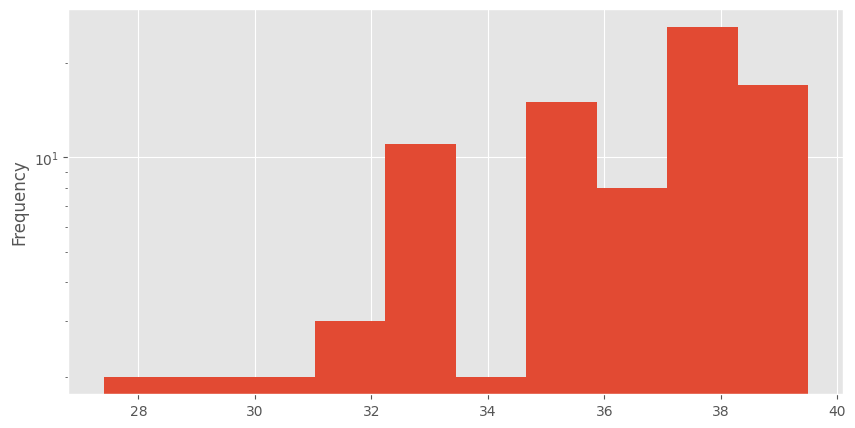

In [ ]:
my_density_both = stats.gaussian_kde(df_both, bw_method = 0.3)
x = np.linspace(min(df_both), max(df_both), 1000)
df_both.plot.hist(logy = True)
# plt.plot(x, my_density_both(x))

In [ ]:
# df_men = np.log(df_men)
# df_women = np.log(df_women)

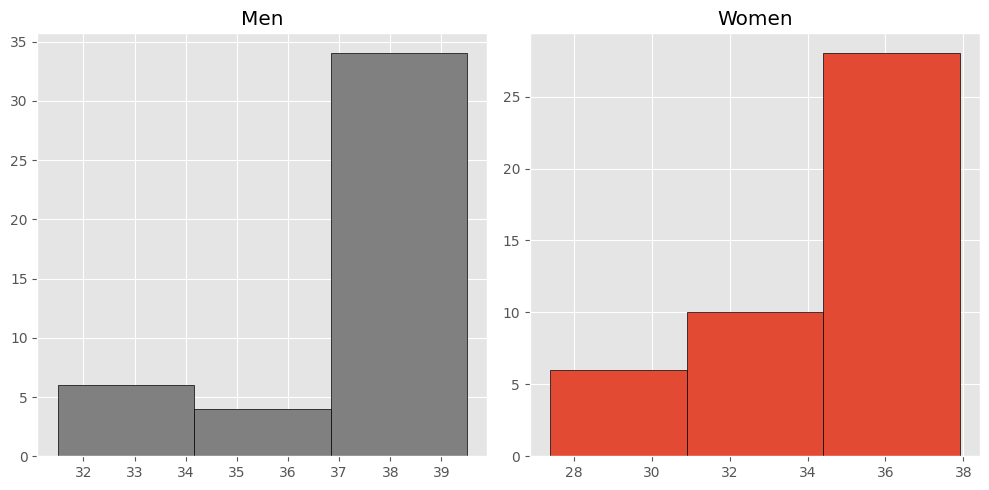

In [ ]:
count_of_cut = 4
sections = np.linspace(min(df_men), max(df_men), count_of_cut)
sections_2 = np.linspace(min(df_women), max(df_women), count_of_cut)
# df_men_cut = pd.cut(df_men, bins = sections).dropna()
# print(df_men_cut)
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].hist(df_men, bins=sections, edgecolor='black', color = 'grey')
axes[0].set_title('Men')
axes[1].hist(df_women, bins =sections_2, edgecolor='black')
axes[1].set_title('Women')
plt.tight_layout()
plt.show()

In [ ]:
ax = df.boxplot()

##Критерии согласия


###Критерий Пирсона

In [ ]:
mean_value, median, standDeviation_value = get_stat_values(df_both, False)

In [ ]:
stats.chisquare(df_both) # Проверяем на нормальное распределение с помощью критерия Пирсона

Power_divergenceResult(statistic=20.098319593164664, pvalue=0.9999999999999946)

Не понимаю, как работает встроенная функция (Критерий согласия Пирсона). Pvalue значительно больше критерия значимости. Но выборка по гистограмме явно не нормально распределенная ._.

###Критерий Колмогорова

In [ ]:
from scipy.stats import kstest
x = stats.norm.rvs(size=20)

p_value = res[1]
print('p-value =', res[1])
alpha = 0.05 # Критерий значимости
if p_value < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не отвергаем нулевую гипотезу")


p_value = kstest(np.log(df_both), stats.norm.cdf)

p-value = 1.213882974400567e-293
Отвергаем нулевую гипотезу


Гипотеза H0 - выборка подвержена нормальному распределению - отвергается

## Критерии однородности
Критерий Колмогорова-Смирнова  - можно использовать?


In [ ]:
from scipy.stats import ks_2samp
ks_2samp(np.log(df_men), np.log(df_women))

KstestResult(statistic=0.6136363636363636, pvalue=4.671934988381054e-08, statistic_location=3.6136169696133895, statistic_sign=-1)

Критерий Вилкоксона - сдвиг?

In [ ]:
shift = abs(df_men.describe()['mean'] - df_women.describe()['mean'])

stats.wilcoxon(np.log(df_men), np.log(df_women+shift), alternative = 'two-sided')

WilcoxonResult(statistic=478.0, pvalue=0.8488191791855115)

In [ ]:
stats.wilcoxon(np.log(df_men), np.log(df_women), alternative = 'two-sided')

WilcoxonResult(statistic=0.0, pvalue=1.1368683772161603e-13)

Критерий Манна-Уитни

In [ ]:
stats.mannwhitneyu (np.log10(df_men), np.log10(df_women+shift))

MannwhitneyuResult(statistic=913.0, pvalue=0.6490181793887331)

Гипотеза о равенстве распределений двух выборок - отвергается

## Критерий равенства средних

Критерий Стьюдента

H0 - среднее время работы мужчин - 39 часов в неделю

In [ ]:
import scipy.stats.ttest_1samp as stats
data_test = df_men.tolist()

# expected = df_women.tolist()
stats.ttest_1samp (a=data_test, popmean = 38)

TtestResult(statistic=-1.6614926327005841, pvalue=0.10388942224338381, df=43)

Alpha  = 0.05

H0 - не отвергается

# Следующий датасет
Средний доход


In [ ]:
def load_data(xls_file):
  df = pd.read_excel(xls_file)
  df = df.dropna()
  for column in df.columns:

      if column != 'Country ':


        df[column] = np.round(df[column] / 1000, 1)
        # df[column] = df[column]
      else:
        df = df.drop(columns = column)
  return df
df = load_data('Median_income_2.xlsx')
# print(df['Belgium'].value_counts())

all_values = np.array([])
for column in df.columns:
  all_values = np.append(all_values, df[column])
df_all_values = np.log10(pd.DataFrame(all_values))

/usr/local/lib/python3.10/dist-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


In [ ]:
df.columns

Index(['Country', 'Belgium', 'Bulgaria', 'Czechia', 'Denmark', 'Germany',
       'Estonia', 'Ireland', 'Greece', 'Spain', 'France', 'Croatia', 'Italy',
       'Cyprus', 'Latvia', 'Lithuania', 'Luxembourg', 'Hungary', 'Malta',
       'Netherlands', 'Austria', 'Poland', 'Portugal', 'Romania', 'Slovenia',
       'Slovakia', 'Finland', 'Sweden', 'Norway', 'Switzerland', 'Montenegro',
       'North Macedonia', 'Serbia', 'Türkiye'],
      dtype='object')

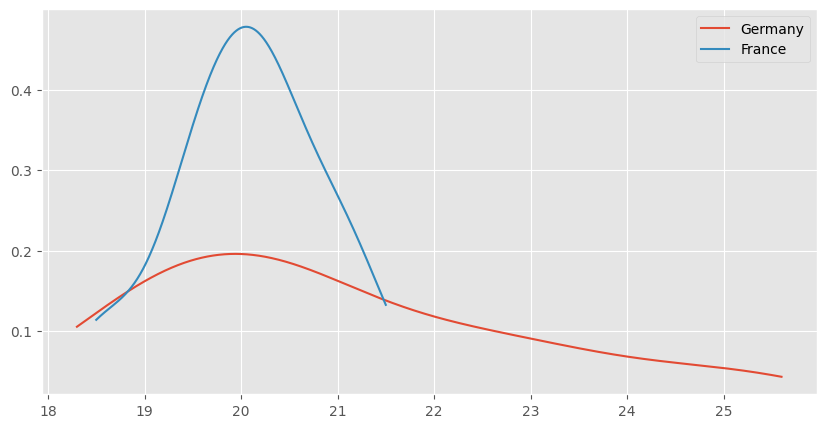

In [ ]:
x_1 = np.linspace(min(df['Germany']), max(df['Germany']), 1000)
x_2 = np.linspace(min(df['France']), max(df['France']), 1000)
my_density_1 = stats.gaussian_kde(df['Germany'], bw_method = 0.5)
my_density_2 = stats.gaussian_kde(df['France'], bw_method = 0.5)
# my_density_3 = stats.gaussian_kde(df['Italy'], bw_method = 0.8)
plt.plot(x_1, my_density_1(x_1), label = 'Germany')
plt.plot(x_2, my_density_2(x_2), label = 'France')
plt.legend()

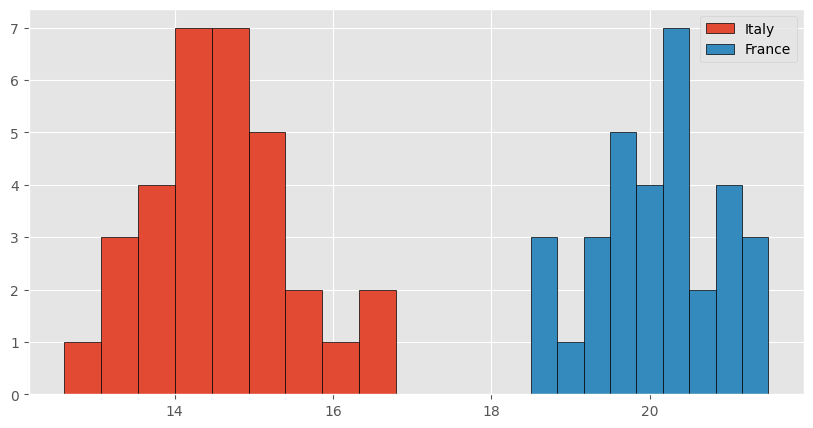

In [ ]:
count_of_cut = 10
country_1 = 'Italy'
country_2 = 'France'
df_test1 = df[country_1]
df_test2 = (df[country_2])
sections_1 = np.linspace(min(df_test1), max(df_test1), count_of_cut)
sections_2 = np.linspace(min(df_test2), max(df_test2), count_of_cut)
# fig, axs = plt.subplots(nrows=1, ncols=2)
plt.hist(df_test1, bins = sections_1, edgecolor='black', label = country_1)
plt.hist(df_test2, bins = sections_2, edgecolor='black', label = country_2)
plt.legend()

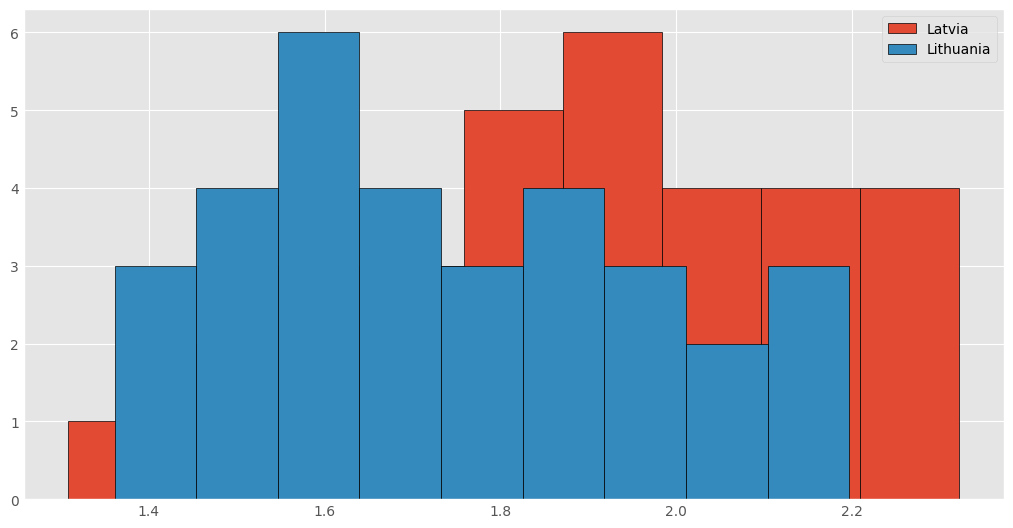

In [ ]:
count_of_cut = 10
country_1 = 'Latvia'
country_2 = 'Lithuania'
df_test1 = np.log(df[country_1])
df_test2 = np.log(df[country_2])
sections_1 = np.linspace(min(df_test1), max(df_test1), count_of_cut)
sections_2 = np.linspace(min(df_test2), max(df_test2), count_of_cut)
# fig, axs = plt.subplots(nrows=1, ncols=2)
plt.hist(df_test1, bins = sections_1, edgecolor='black', label = country_1)
plt.hist(df_test2, bins = sections_2, edgecolor='black', label = country_2)
plt.legend()

In [ ]:
df_test_2 = np.log10(df['Latvia'])
df_test_1 = np.log10(df['Lithuania'])

In [ ]:
from statsmodels.stats.descriptivestats import sign_test

In [ ]:
mu = df_test_2.median()
print(mu)
mu_2 = df_test_1.median()
print(mu_2)

1.3031906825553023
1.3096301674258988


In [ ]:
from statsmodels.stats.descriptivestats import sign_test
p_value = sign_test(df_test_1, df_test_2)[1]
print('p_value = ', p_value)

p_value =  0.029449373483657837


In [ ]:
from scipy.stats import f_oneway

res = f_oneway(df_test_1, df_test_2)
print('p_value = ', res[1] )

p_value =  0.021420491841551263


In [ ]:
from scipy.stats import chi2_contingency
data_1, bins_1 = np.histogram(df_test_1, bins = 'auto')
data_2, bins_2 = np.histogram(df_test_2, bins = 'auto')

observed_data = np.array([data_1, data_2])

# Критерий Пирсона
statistic, p_value, dof, expected = chi2_contingency(observed_data)
print(f"Chi-Square Statistic: {statistic}")
print(f"P-value: {p_value}")

Chi-Square Statistic: 4.86013986013986
P-value: 0.43318643887309016
